# <font face="timesroman" color="purple" size=10> Business Problem</font>
## <font face="timesroman" color="darkblue" size=5>The retailer wants to understand what kind of customers respond to different campaigns and analyze the dataset.</font>

<div style="border: 3px dashed red; padding: 5px;">
     <font face="verdana" color="blue"> 1. Create a consolidated view of data by joining the data present in three files.</font> </div>

In [2]:
# Importing the packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [3]:
# Load demographics data
demographics = pd.read_csv("C:/Users/10jha/Downloads/Retail_Sales_cp/demographics.txt", delimiter="\t")

In [4]:
# Load behavior data
with open("C:/Users/10jha/Downloads/Retail_Sales_cp/behaviour.json") as f:
    behavior_data_list = json.load(f)
    
behavior_data = []
for entry in behavior_data_list:
    customer_id, data = list(entry.items())[0]
    data['ID'] = int(customer_id.split('_')[1])
    behavior_data.append(data)

# Convert behavior data to DataFrame
behavior = pd.DataFrame(behavior_data)

In [5]:
# Load campaign data
with open("C:/Users/10jha/Downloads/Retail_Sales_cp/campaign.json") as f:
    campaign_data_list = json.load(f)
    
campaign_data = []
for entry in campaign_data_list:
    customer_id, data = list(entry.items())[0]
    data['ID'] = int(customer_id.split('_')[1])
    campaign_data.append(data)

# Convert campaign data to DataFrame
campaign = pd.DataFrame(campaign_data)

In [6]:
# Merge dataframes on 'ID'
merged_data = pd.merge(demographics, behavior, on='ID')
total_data= pd.merge(merged_data, campaign, on='ID')

#### <font face="verdana" color="blue"> EDA : </font>

In [7]:
total_data.head(15)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,SP,0,...,4,6,1,0,0,0,0,0,1,0
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,CA,0,...,3,7,5,0,1,0,0,0,1,0
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,US,0,...,2,5,2,0,0,0,0,0,0,0
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,AUS,0,...,0,2,7,0,0,0,0,0,0,0
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,SP,0,...,1,2,7,0,0,1,0,0,1,0
5,7348,1958,PhD,Single,"$71,691.00",0,0,3/17/14,SP,0,...,7,5,2,0,0,0,0,0,1,0
6,4073,1954,2n Cycle,Married,"$63,564.00",0,0,1/29/14,GER,0,...,10,7,6,0,0,1,0,0,1,0
7,1991,1967,Graduation,Together,"$44,931.00",0,1,1/18/14,SP,0,...,1,3,5,0,0,0,0,0,0,0
8,4047,1954,PhD,Married,"$65,324.00",0,1,1/11/14,US,0,...,2,9,4,0,0,0,0,0,0,0
9,9477,1954,PhD,Married,"$65,324.00",0,1,1/11/14,IND,0,...,2,9,4,0,0,0,0,0,0,0


<div style="border: 3px solid black; padding: 30px;">
<font face="Verdana" color="maroon">
The <b>total_data</b> dataFrame combines data from three sources which are json and txt format files.The merging process combines data from demographics, behavior, and campaign sources based on a common 'ID' column. There are total 2240 rows and 9 columns.<br><br>
    <b>columns:</b><br><br>
 'ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ','Kidhome', 'Teenhome', 'Dt_Customer', 'Country', 'Recency', 'MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
'AcceptedCmp5', 'Response', 'Complain'.
</font>
</div>

Behavioral Descriptive Statistics:
           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.0000

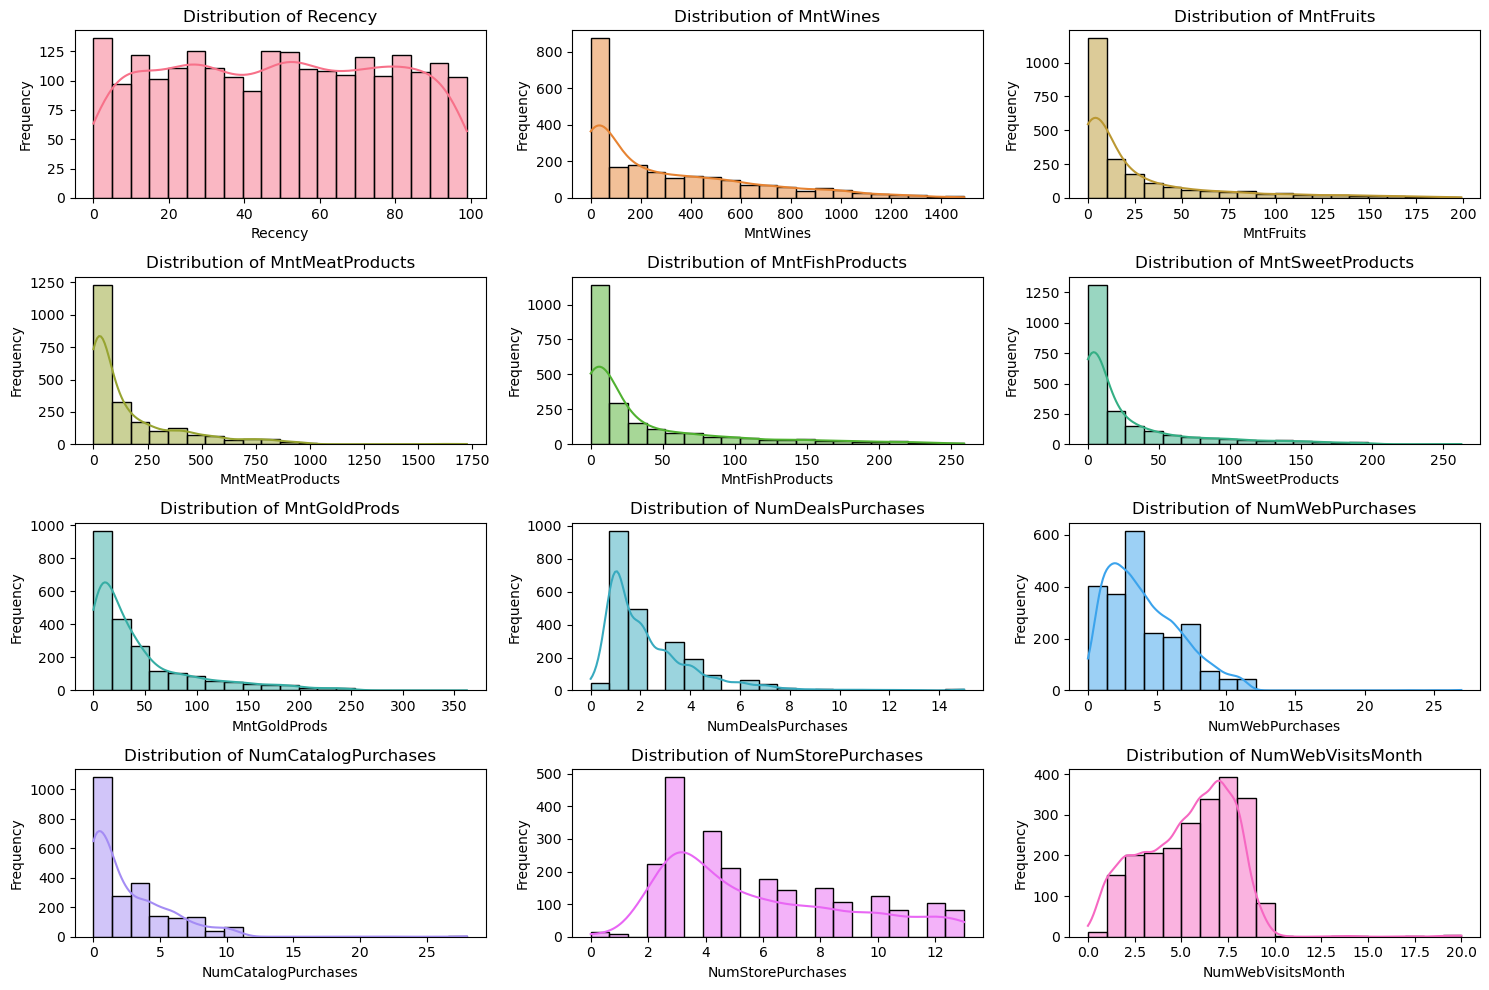

In [8]:
# Describe the numerical columns for behavioral analysis

numerical_features = ['Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
                      'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                      'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

behavioral_description = total_data[numerical_features].describe()

print("Behavioral Descriptive Statistics:")
print(behavioral_description)

# Visualize the behavioral features

plt.figure(figsize=(15, 10))
colors = sns.color_palette('husl', len(numerical_features))  

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(total_data[feature], bins=20, kde=True, color=colors[i-1])  
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show() 


<div style="border: 3px solid black; padding: 30px;">
<font face="Verdana" color="green">
    1. Upon examining the distributions of various numerical variables, a compelling pattern emerges. Notably, metrics such as <i> MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, and MntGoldProds</i> showcase a distinctive right-skewed distribution. This inclination towards the higher end of the scale suggests a prevalence of higher expenditure instances, indicative of a positive skew. Interestingly, analogous positive skewness manifests in the distributions of <i>NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, and NumStorePurchases</i> too.
</font><br><br>
<font face="Verdana" color="green">    
    2. In contrast the distribution of Recency presents a strikingly different narrative. Exhibiting a uniform distribution, this metric suggests a relatively consistent pattern.
</font><br><br>
<font face="Verdana" color="green">      
    3. Among these observations is the left-skewed distribution evident in NumWebVisitsMonth. The skewness is leaning towards visitation frequencies.
</font>
</div>

<div style="border: 3px dashed red; padding: 5px;">
    <font face="verdana" color="blue"> 2. Are there any variables where you will need to clean the raw data, what kind of cleaning will be needed</font> </div>

In [9]:
# First, Remove the leading and trailing whitespaces and currency symbol from ' Income ' column

total_data[' Income '] = total_data[' Income '].astype(str)
total_data[' Income '] = total_data[' Income '].str.replace('$', '').str.replace(',', '').astype(float)

# Convert 'Dt_Customer' column to datetime format

total_data['Dt_Customer'] = pd.to_datetime(total_data['Dt_Customer'], format='%m/%d/%y')

# Display the cleaned data

print(total_data.head())

      ID  Year_Birth   Education Marital_Status   Income   Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced   84835.0        0         0   
1      1        1961  Graduation         Single   57091.0        0         0   
2  10476        1958  Graduation        Married   67267.0        0         1   
3   1386        1967  Graduation       Together   32474.0        1         1   
4   5371        1989  Graduation         Single   21474.0        1         0   

  Dt_Customer Country  Recency  ...  NumCatalogPurchases  NumStorePurchases  \
0  2014-06-16      SP        0  ...                    4                  6   
1  2014-06-15      CA        0  ...                    3                  7   
2  2014-05-13      US        0  ...                    2                  5   
3  2014-05-11     AUS        0  ...                    0                  2   
4  2014-04-08      SP        0  ...                    1                  2   

   NumWebVisitsMonth  AcceptedCmp1  Accepted

C:\Users\10jha\AppData\Local\Temp\ipykernel_13864\2129052237.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  total_data[' Income '] = total_data[' Income '].str.replace('$', '').str.replace(',', '').astype(float)


In [10]:
# Check for any missing values after cleaning the data
missing_values = total_data.isnull().sum()
print("\nMissing Values after Cleaning:")
print(missing_values)

#the datatype 
dtype = total_data.dtypes
print("\nDatatypes of the columns:", dtype)


Missing Values after Cleaning:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Country                 0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
Response                0
Complain                0
dtype: int64

Datatypes of the columns: ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
 Income                       float64
Kidhome   

In [11]:
# Impute missing values in the 'Income' column with the mean
mean_income = total_data[' Income '].mean()
total_data[' Income '] = total_data[' Income '].fillna(mean_income)

In [12]:
# Check for and remove duplicate rows
duplicate_rows = total_data.duplicated()
if duplicate_rows.any():
    print("Duplicate rows found. Removing duplicates...")
    total_data = total_data.drop_duplicates()
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")


No duplicate rows found.


<div style="border: 3px solid black; padding: 30px;">
<font face="Verdana" color="maroon">
    Summary of the cleaning steps performed:<br><br>
1.Cleaning 'Income' Column:
Removed leading and trailing whitespaces and currency symbol ('$') from the 'Income' column. Converted the cleaned 'Income' column to a numerical format (float).<br><br>
2. Cleaning 'Dt_Customer' Column: Converted the 'Dt_Customer' column to datetime format using the specified format ('%m/%d/%y').  Verified that the 'Income' column is now of type float64, and 'Dt_Customer' column is of type datetime64.<br><br>
3. Summary Statistics of Numerical Columns: Provided summary statistics for all numerical columns in the dataset, including count, mean, standard deviation, minimum, maximum, and quartiles.<br><br>
4. Checking for Missing Values after Cleaning: Confirmed the presence of missing values in the 'Income' column (24 missing values). Replaced the missing values with mean.<br><br>
5.Checking for Duplicate Rows after Cleaning: Verified that there are no duplicate rows in the cleaned dataset.<br><br> 
 Overall, the cleaning process addressed potential issues such as leading/trailing whitespaces, currency symbols, and data type conversions, ensuring that the dataset is suitable for further analysis.
</font>
</div>

<div style="border: 3px dashed red; padding: 5px;">
    <font face="Verdana" color="blue"> 3. Create a data quality report after doing the necessary cleaning and joining of the files by: </font>
    <font face="Verdana" color="blue"> a.Doing univariates for continuous variables (compute: percentage of missing values, percentage of terms which are zero, mean, 25th, 50th, 75th, 90th and 95th percentile, min and max.</font>
    <font face="Verdana" color="blue">  b.Doing univariates for categorical variables (compute:percentage of missing values,number of unique values </font></div>

In [13]:
# Data quality report for continuous variablesior
continuous_variables = ['Year_Birth', ' Income ', 'Recency', 'MntWines', 'MntFruits', 
                         'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
                         'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
                         'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

continuous_report = total_data[continuous_variables].describe(percentiles=[.25, .50, .75, .90, .95])
continuous_report = continuous_report.transpose()

# Compute percentage of missing values for continuous variables
missing_percentage_continuous = (total_data[continuous_variables].isnull().mean() * 100).to_frame(name='Missing Percentage')

# Compute percentage of terms which are zero for continuous variables
zero_percentage_continuous = (total_data[continuous_variables].eq(0).mean() * 100).to_frame(name='Zero Percentage')

# Combine all continuous variable statistics into a single report
continuous_report = pd.concat([missing_percentage_continuous, zero_percentage_continuous, continuous_report], axis=1)

# Display the data quality reports
print("Data Quality Report for Continuous Variables:")
print(continuous_report)

Data Quality Report for Continuous Variables:
                     Missing Percentage  Zero Percentage   count  \
Year_Birth                          0.0         0.000000  2240.0   
 Income                             0.0         0.000000  2240.0   
Recency                             0.0         1.250000  2240.0   
MntWines                            0.0         0.580357  2240.0   
MntFruits                           0.0        17.857143  2240.0   
MntMeatProducts                     0.0         0.044643  2240.0   
MntFishProducts                     0.0        17.142857  2240.0   
MntSweetProducts                    0.0        18.705357  2240.0   
MntGoldProds                        0.0         2.723214  2240.0   
NumDealsPurchases                   0.0         2.053571  2240.0   
NumWebPurchases                     0.0         2.187500  2240.0   
NumCatalogPurchases                 0.0        26.160714  2240.0   
NumStorePurchases                   0.0         0.669643  2240.0   
Nu

<font face="Verdana" color="green"> Plotting of continuous variable.</font>

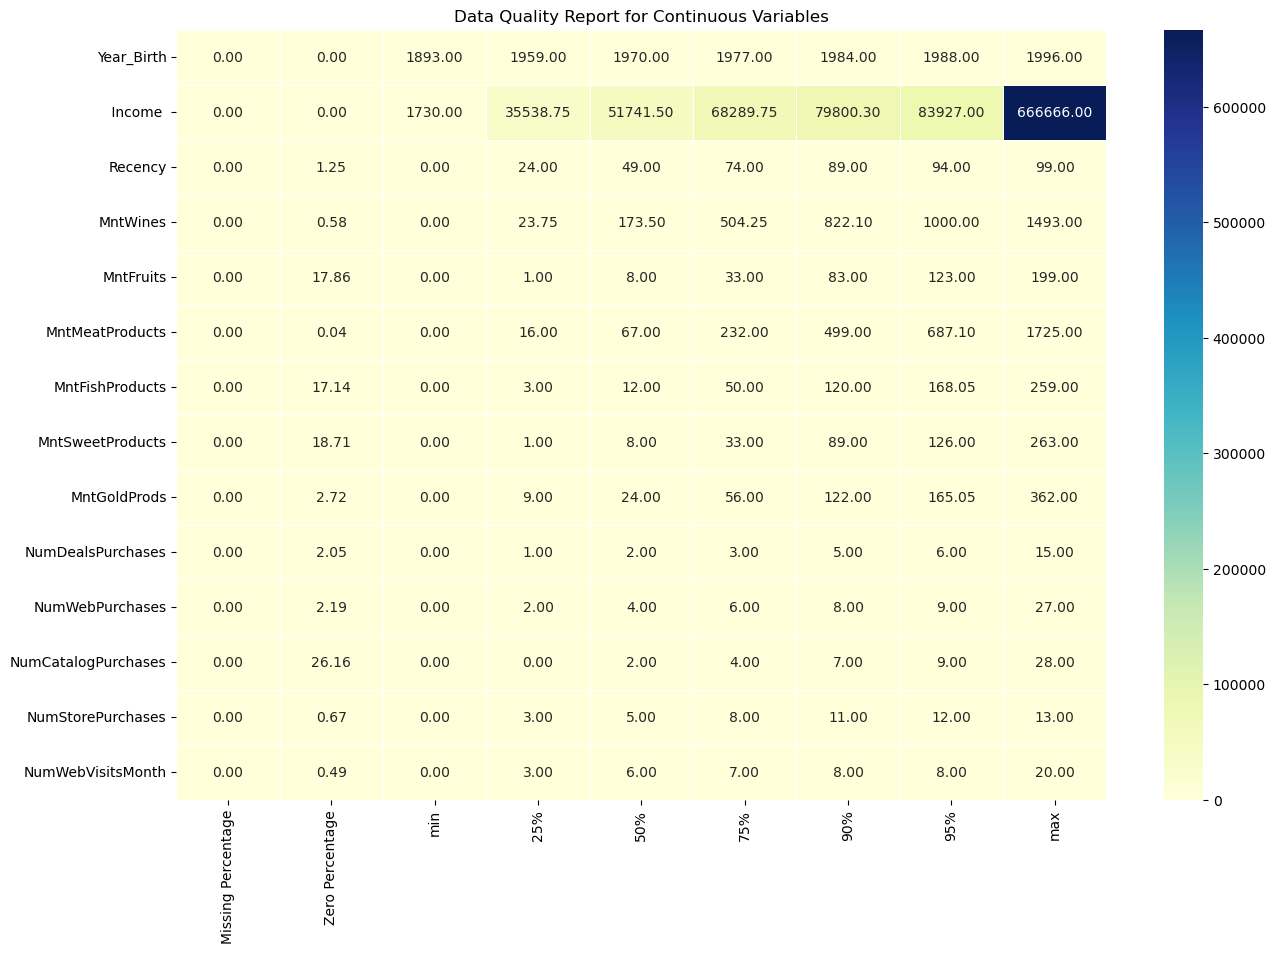

In [14]:
plt.figure(figsize=(15, 10))
sns.heatmap(continuous_report.drop(columns=['count', 'mean', 'std']).astype(float), annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title('Data Quality Report for Continuous Variables')
plt.show()

<div style="border: 3px solid black; padding: 30px;">
<font face="Verdana" color="green">
    There are no missing values in any of the variables, indicating that the dataset is complete. <br><br>
<b>Distribution of Values:</b><br>
    <b>Year of Birth:</b> The majority of customers were born between 1959 and 1988, with the average birth year around 1969.<br>
    <b>Income:</b>The income distribution shows a wide range, with the average income being approximately 52,247. However, there is a presence of outliers, as the maximum income reaches 666,666.<br>
<b>Recency:</b> The average time since the last purchase (Recency) is approximately 49 days, with most customers having made purchases recently.<br>
<b>Purchase Behavior:</b>Customers tend to purchase various types of products.But,there are significant percentages of zero purchases for fruits, fish, sweet products, and gold products. This suggests that a portion of customers might not be interested in these product categories.<br>
<b>Amount Spent on Products:</b><br>
Customers spend on different product categories. For instance, while wine and meat products seem to be popular, fruits, fish, and sweet products see relatively lower expenditure on average,indicating diversity in customer preferences.<br>
    <b> Web Visits:</b>
On average, customers visit the website around 5 times a month, with some variation in frequency
</font>
</div>

In [15]:
# Data quality report for categorical variables
categorical_variables = ['Education', 'Marital_Status', 'Country']

categorical_report = total_data[categorical_variables].describe(include='all').transpose()

# Compute percentage of missing values for categorical variables
missing_percentage_categorical = (total_data[categorical_variables].isnull().mean() * 100).to_frame(name='Missing Percentage')

# Compute number of unique values for categorical variables
unique_values_categorical = total_data[categorical_variables].nunique().to_frame(name='Number of Unique Values')

# Combine all categorical variable statistics into a single report
categorical_report = pd.concat([missing_percentage_categorical, unique_values_categorical, categorical_report], axis=1)

# Display the data quality reports
print("\nData Quality Report for Categorical Variables:")
print(categorical_report)


Data Quality Report for Categorical Variables:
                Missing Percentage  Number of Unique Values count unique  \
Education                      0.0                        5  2240      5   
Marital_Status                 0.0                        8  2240      8   
Country                        0.0                        8  2240      8   

                       top  freq  
Education       Graduation  1127  
Marital_Status     Married   864  
Country                 SP  1095  


<font face="Verdana" color="green"> Plotting of categorial variable.</font>

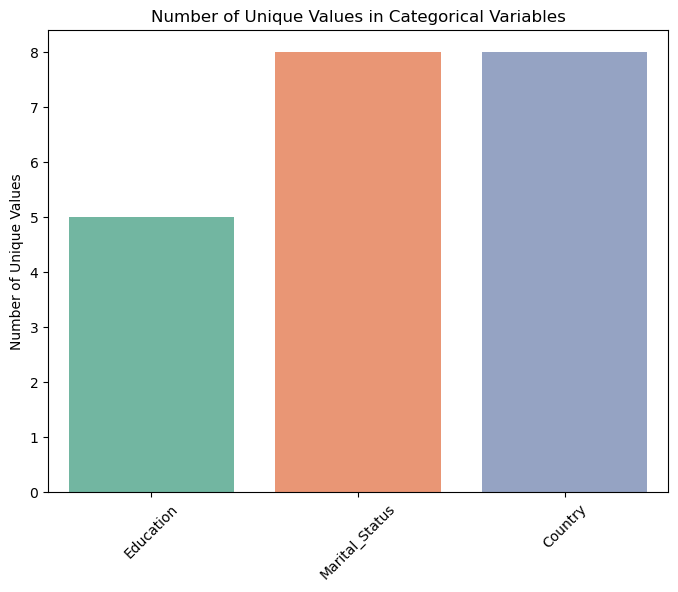

In [16]:
# Plotting number of unique values in categorical variables
plt.figure(figsize=(8, 6))
sns.barplot(x=categorical_report.index, y='Number of Unique Values', data=categorical_report, palette='Set2')
plt.title('Number of Unique Values in Categorical Variables')
plt.xticks(rotation=45)
plt.show()


<div style="border: 3px solid black; padding: 30px;">
<font face="Verdana" color="green">
   Analysis of the data quality report for categorical variables:<br><br>
<u><b>Missing Percentage:</b></u>
    There are no missing values in the all the mention categorial variable.<br><br>
    
<u><b>Number of Unique Values:</b></u>
There are 5 unique education levels and 8 uniques martial status and countires respectively present in the dataset.<br><br>

<u><b>Count Unique:</b></u>
All 2240 entries have a non-null value for Education,martial status and country.<br><br>

<u><b>Top Category: </b></u>
The most common education level is "Graduation", with 1127 occurrences. "Married", with 864 occurrences in martial status.<br><br>
</font>
</div>

#### <font face="verdana" color="blue">Performed chi-square test for categorical variables </font>

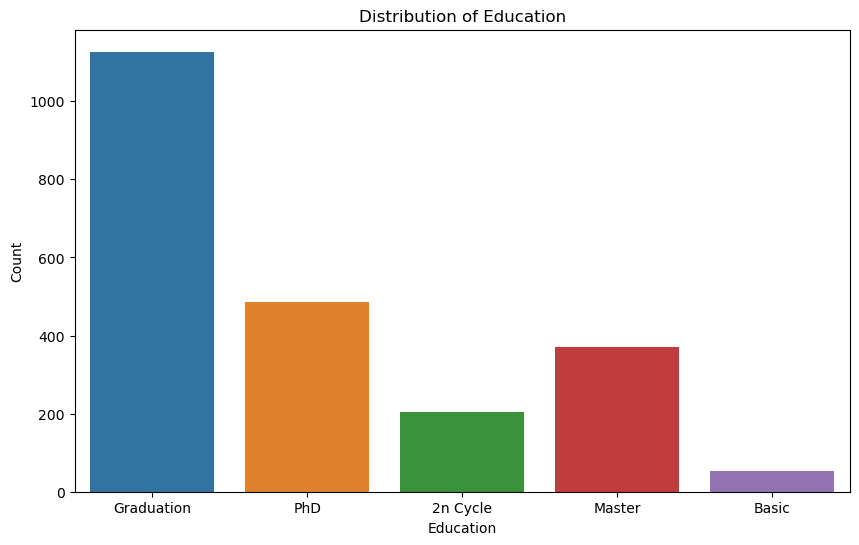

Chi-square p-value for Education vs Response: 0.00012226975294505314


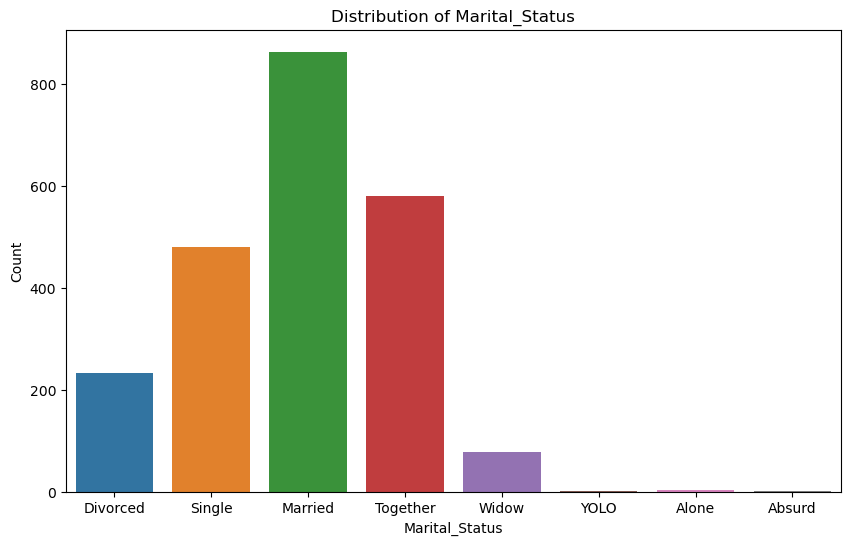

Chi-square p-value for Marital_Status vs Response: 2.1067470540906996e-09


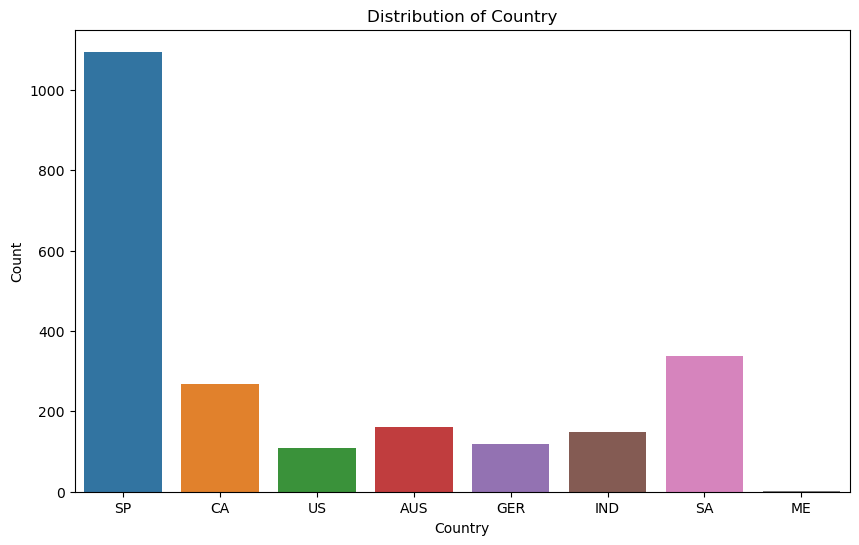

Chi-square p-value for Country vs Response: 0.0741506651676837


In [17]:
from scipy.stats import chi2_contingency

def perform_chi_square_test(data, variable1, variable2):
    contingency_table = pd.crosstab(data[variable1], data[variable2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return p

# Bar plot for categorical variables
def plot_categorical(data, variable):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=variable)
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.show()

# Interpretation of charts
for variable in categorical_variables:
    plot_categorical(total_data, variable)
    p_value = perform_chi_square_test(total_data, variable, 'Response')
    print(f"Chi-square p-value for {variable} vs Response: {p_value}")

<div style="border: 3px solid black; padding: 30px;">
<font face="Verdana" color="green">
  <b> Based on the chi-square p-values:</b><br><br>
<u><b>Education vs Response:</b></u>The p-value (0.00012) is less than the significance level (e.g., 0.05), indicating a statistically significant association between education level and response to the campaign. Therefore, <i>education level may have a significant impact on the response rate.</i><br><br>

<u><b>Marital_Status vs Response:</b></u> The p-value (2.1067e-09) is significantly less than the significance level, suggesting a strong association between marital status and response to the campaign. <i>Marital status appears to be a significant factor influencing the response rate.</i><br><br>

<u><b>Country vs Response:</b></u> The p-value (0.074) is greater than the significance level (e.g., 0.05), indicating that there is no statistically significant association between country and response to the campaign. Therefore, <i>the country of residence may not play a significant role in determining the response rate.</i><br><br>
In summary, both <b>education level</b> and <b>marital status</b> seem to be important factors affecting the response rate to the campaign, while the <b>country of residence</b> does not show a significant association with the response, "SP" (assumed to be an abbreviation for Spain or singapore), with 1095 occurrences.<br><br>
</font>
</div> 

<div style="border: 3px dashed red; padding: 5px;">
    <font face="Verdana" color="blue"> 4. Are there any extreme values of variables representing income, amount of money
spent on various categories, recency of purchase? </font></div>

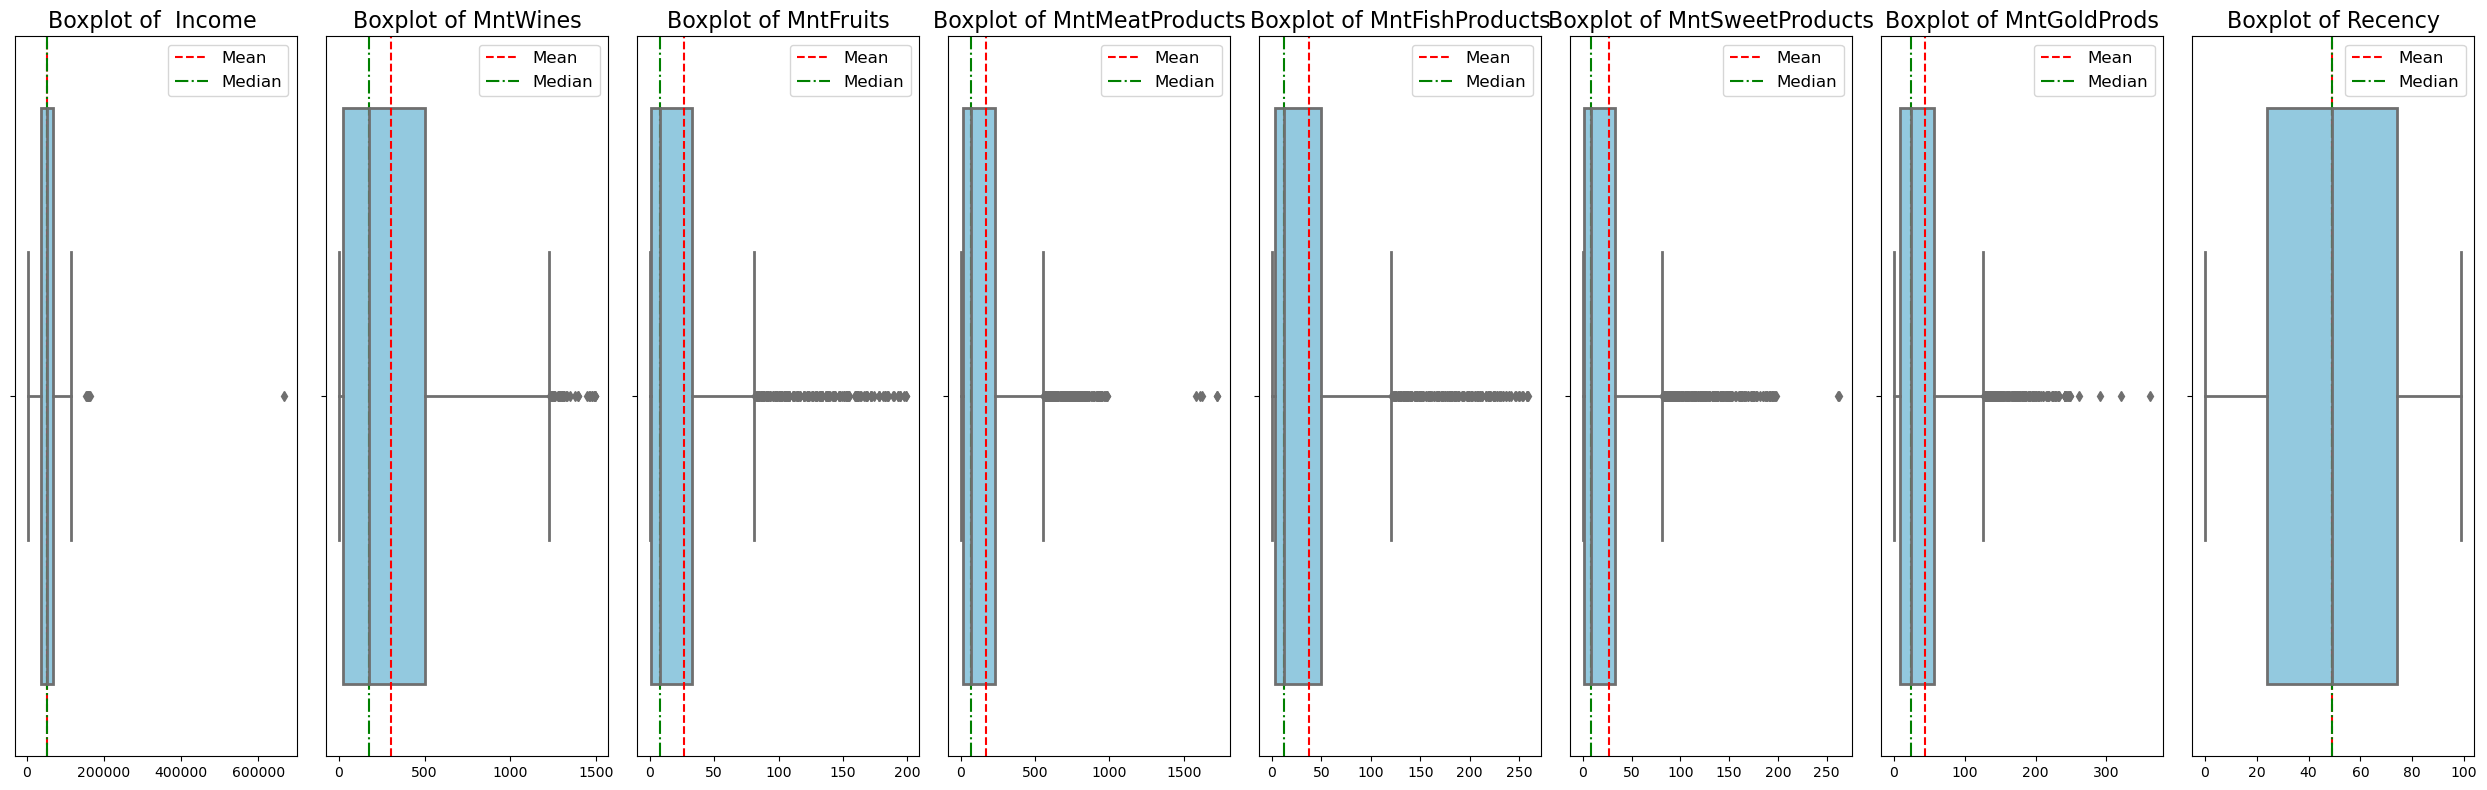

In [18]:
# Define variables
income_vars = [' Income ']
spending_vars = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
recency_var = ['Recency']

# Combine all relevant variables for analysis
vars_for_analysis = income_vars + spending_vars + recency_var

# Set up subplots with larger figure size
fig, axes = plt.subplots(nrows=1, ncols=len(vars_for_analysis), figsize=(25, 8))

# Create box plots for each variable with customized appearance
for i, var in enumerate(vars_for_analysis):
    sns.boxplot(x=total_data[var], ax=axes[i], linewidth=2, color='skyblue')
    
    # Set title and labels with larger font sizes
    axes[i].set_title(f'Boxplot of {var}', fontsize=16)
    axes[i].set_xlabel('', fontsize=14)
    axes[i].set_ylabel('', fontsize=14)

    # Add mean and median lines
    mean_val = total_data[var].mean()
    median_val = total_data[var].median()
    axes[i].axvline(mean_val, color='red', linestyle='--', label='Mean')
    axes[i].axvline(median_val, color='green', linestyle='-.', label='Median')

    # Add legend with larger font size
    axes[i].legend(fontsize=12)

plt.tight_layout()
plt.show()

<div style="border: 3px solid black; padding: 30px;">
<font face="Verdana" color="green">
 <u>Based on the box plots of income, spending on various categories, and recency of purchase, here are some inferences:</u><br><br>
    <u><b>Income:</b></u> There are a few outliers in the higher income range, indicating the presence of individuals with significantly higher income levels compared to the majority. The distribution of income is right-skewed, with a longer tail towards higher income levels. The mean (red dashed line) is generally higher than the median (green dash-dot line), suggesting positive skewness.<br><br> 
    
<u><b>Spending on Various Categories (MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds):</b></u>Each spending category shows varying degrees of skewness and presence of outliers, especially towards higher spending amounts. For some categories like 'MntWines' and 'MntGoldProds', the distribution is right-skewed with a longer tail on the higher end, indicating higher spending by a few customers. In contrast, 'MntFruits' and 'MntFishProducts' exhibit less skewness, with fewer outliers and a relatively more symmetric distribution. The presence of outliers suggests that there are customers who spend significantly more in certain categories compared to the rest.<br><br>
    
<u><b>Recency of Purchase</b></u>The distribution of recency appears to be left-skewed, indicating that most customers made purchases relatively recently. There are no visible outliers in the recency variable, suggesting that the majority of customers have made recent purchases. Both the mean and median lines are close to each other, indicating a relatively symmetric distribution without significant skewness.<br><br>

Overall, the box plots provide insights into the distribution and variability of income, spending behavior across different categories, and recency of purchases among customers. The presence of outliers in income and spending categories highlights the presence of high-value customers, which could be important for targeted marketing strategies.
</font>
</div>

<div style="border: 3px dashed red; padding: 5px;">
    <font face="Verdana" color="blue"> 5. Generate and check hypothesis around Amount Spent on different categories and response rate in different marketing campaigns </font></div>

<font face="verdana" color="blue" size=1>Hypothesis 1: Difference in mean amount spent on wines and fruits among responders.<br><br>Null Hypothesis ($H_0$): There is no significant difference in the mean amount spent on wines and fruits among responders.<br> Alternate Hypothesis ($H_1$): There is a significant difference in the mean amount spent on wines and fruits among responders.<br> 
</font>

In [19]:
import scipy.stats as stats

#Difference in mean amount spent on wines and fruits among responders
wine_spending_responders = total_data.loc[total_data['Response'] == 1, 'MntWines']
fruit_spending_responders = total_data.loc[total_data['Response'] == 1, 'MntFruits']

t_statistic, p_value = stats.ttest_rel(wine_spending_responders, fruit_spending_responders)
print("\nHypothesis: Difference in mean amount spent on wines and fruits among responders")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")


Hypothesis: Difference in mean amount spent on wines and fruits among responders
T-statistic: 20.4675
P-value: 0.0000


<div style="border: 3px solid black; padding: 30px;">
<font face="Verdana" color="maroon">
Among responders, there is a significant difference in the mean amount spent on wines compared to fruits, with respondents spending more on wines.<br>
    <b>We reject the null hypothesis.</b>
    
</font>
</div>

<font face="verdana" color="blue" size=1> Hypothesis 2: Difference in mean amount spent on meat products between responders and non-responders in the 1st campaign. <br><br>
Alternate Hypothesis ($H_1$): There is a significant difference in the mean amount spent on meat products between responders and non-responders in the 1st campaign. <br>
Null Hypothesis ($H_0$): There is no significant difference in the mean amount spent on meat products between responders and non-responders in the 1st campaign.
</font>

In [20]:
# Hypothesis :Difference in the amount spent on meat products between customers who responded positively (accepted the offer) 
#in the 1st campaign compared to those who did not.
meat_spending_responders = total_data.loc[total_data['AcceptedCmp1'] == 1, 'MntMeatProducts']
meat_spending_non_responders = total_data.loc[total_data['AcceptedCmp1'] == 0, 'MntMeatProducts']

t_statistic, p_value = stats.ttest_ind(meat_spending_responders, meat_spending_non_responders, equal_var=False)
print(f"\nHypothesis : Difference in meat spending between responders and non-responders in the 1st campaign")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")


Hypothesis : Difference in meat spending between responders and non-responders in the 1st campaign
T-statistic: 12.7126
P-value: 0.0000


<div style="border: 3px solid black; padding: 30px;">
<font face="Verdana" color="maroon">
Difference in meat spending between responders and non-responders in the 1st campaign<br><br>
The t-statistic of 12.7126 indicates a significant difference in the amount spent on meat products between customers who responded positively and those who did not in the 1st campaign. The p-value of 0.0000 is less than the conventional significance level, <b>providing strong evidence to reject the null hypothesis.</b> Therefore, there is support for the hypothesis that there is a significant difference in meat spending between responders and non-responders in the 1st campaign.<br><br>
These results suggest meaningful relationships between the variables and provide insights into the spending patterns of customers who respond positively to marketing campaigns.
</font>
</div>

<font face="verdana" color="blue" size=1>Hypothesis 3:Correlation between amount spent on wines and response rate
Customers who spent more on wines are more likely to respond positively to marketing campaigns.<br><br>
Alternate Hypothesis ($H_1$): There is a correlation between customers who spent more on wines are more likely to respond positively to marketing campaigns.<br>
Null Hypothesis ($H_0$): There is no correlation between amount spent on wines and response rate.
</font><br><br>

In [21]:
# Hypothesis 3: Customers who spent more on wines are more likely to respond positively to marketing campaigns.
# Hypothesis: Correlation between amount spent on wines and response rate
wine_spending = total_data['MntWines']
response_rate = total_data['Response']

correlation, p_value = stats.spearmanr(wine_spending, response_rate)
print(f"Hypothesis : Correlation between amount spent on wines and response rate")
print(f"Correlation coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

Hypothesis : Correlation between amount spent on wines and response rate
Correlation coefficient: 0.1990
P-value: 0.0000


<div style="border: 3px solid black; padding: 30px;">
<font face="Verdana" color="maroon">
Correlation between amount spent on wines and response rate<br><br>
    The correlation coefficient of 0.1990 indicates a positive correlation between the amount spent on wines and the response rate. The p-value of 0.0000 is less than the conventional significance level (e.g., 0.05), suggesting that the <b>correlation is statistically significant.</b><br><br>
Therefore, there is evidence to support the hypothesis that customers who spent more on wines are more likely to respond positively to marketing campaigns.
     <b>We reject the null hypothesis.</b>
</font>
</div>

<div style="border: 3px dashed red; padding: 5px;">
    <font face="Verdana" color="blue">6. Create a funnel analysis showing what percentage of unique customers accept campaign 1,2,3,..etc </font></div>

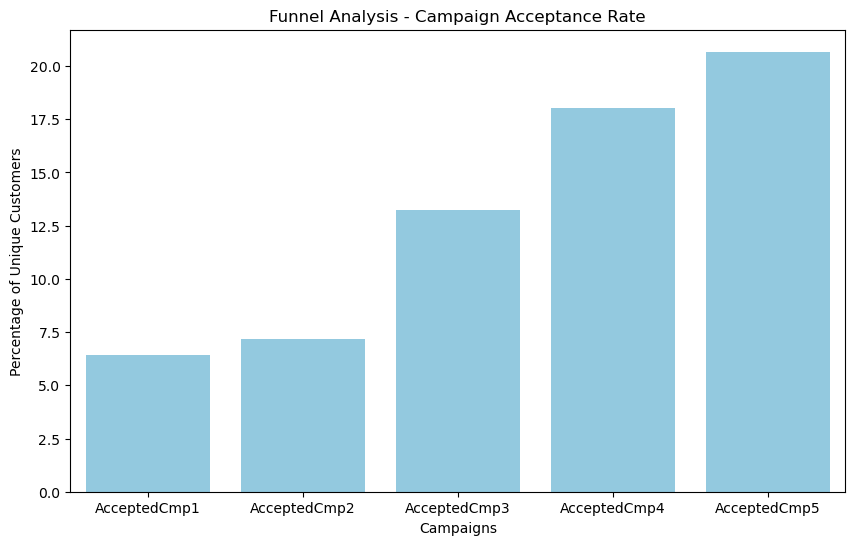

Inference:
The percentage of unique customers accepting Campaign 1: 6.43%
The percentage of unique customers accepting Campaign 2: 7.19%
The percentage of unique customers accepting Campaign 3: 13.21%
The percentage of unique customers accepting Campaign 4: 18.04%
The percentage of unique customers accepting Campaign 5: 20.67%


In [22]:
# Define the list of campaign columns
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Create a DataFrame for the funnel analysis
funnel_data = total_data[campaign_columns].copy()

# Calculate the acceptance rate at each stage
# Initialize an empty list to store the percentage of unique customers at each stage
funnel_percentage = []

# Loop through each campaign column to calculate the cumulative acceptance rate
for column in campaign_columns:
    # Calculate the cumulative acceptance for the current campaign stage
    # by taking the logical OR of the current column with the previous stages
    funnel_data[column] = funnel_data[column] | funnel_data[campaign_columns[:campaign_columns.index(column)]].any(axis=1)
    # Calculate the percentage of unique customers who accepted the current campaign
    acceptance_percentage = (funnel_data[column].sum() / len(funnel_data)) * 100
    funnel_percentage.append(acceptance_percentage)

# Plot the funnel analysis
plt.figure(figsize=(10, 6))
sns.barplot(x=campaign_columns, y=funnel_percentage, color='skyblue')
plt.title('Funnel Analysis - Campaign Acceptance Rate')
plt.xlabel('Campaigns')
plt.ylabel('Percentage of Unique Customers')
plt.show()

# Inference:
print("Inference:")
for i, column in enumerate(campaign_columns):
    print(f"The percentage of unique customers accepting Campaign {i+1}: {funnel_percentage[i]:.2f}%")

<div style="border: 3px solid black; padding: 30px;">
<font face="Verdana" color="green">
    <b>Inference:</b><br><br>
The analysis highlights varying acceptance rates among unique customers across different campaigns. Campaigns 4 and 5 exhibit notably higher acceptance rates of 18.04% and 20.67%, respectively, indicating their effectiveness in engaging customers compared to the earlier campaigns.
</font>
</div>

<div style="border: 3px dashed red; padding: 5px;">
    <font face="Verdana" color="blue">7. Find out how income impacts the amount spent on - Wine - Meat Products - Gold Products - Fish Products?</font></div>

Correlation coefficients:
Income vs Wine spending: 0.5768
Income vs Meat spending: 0.5778
Income vs Gold spending: 0.3220
Income vs Fish spending: 0.4375


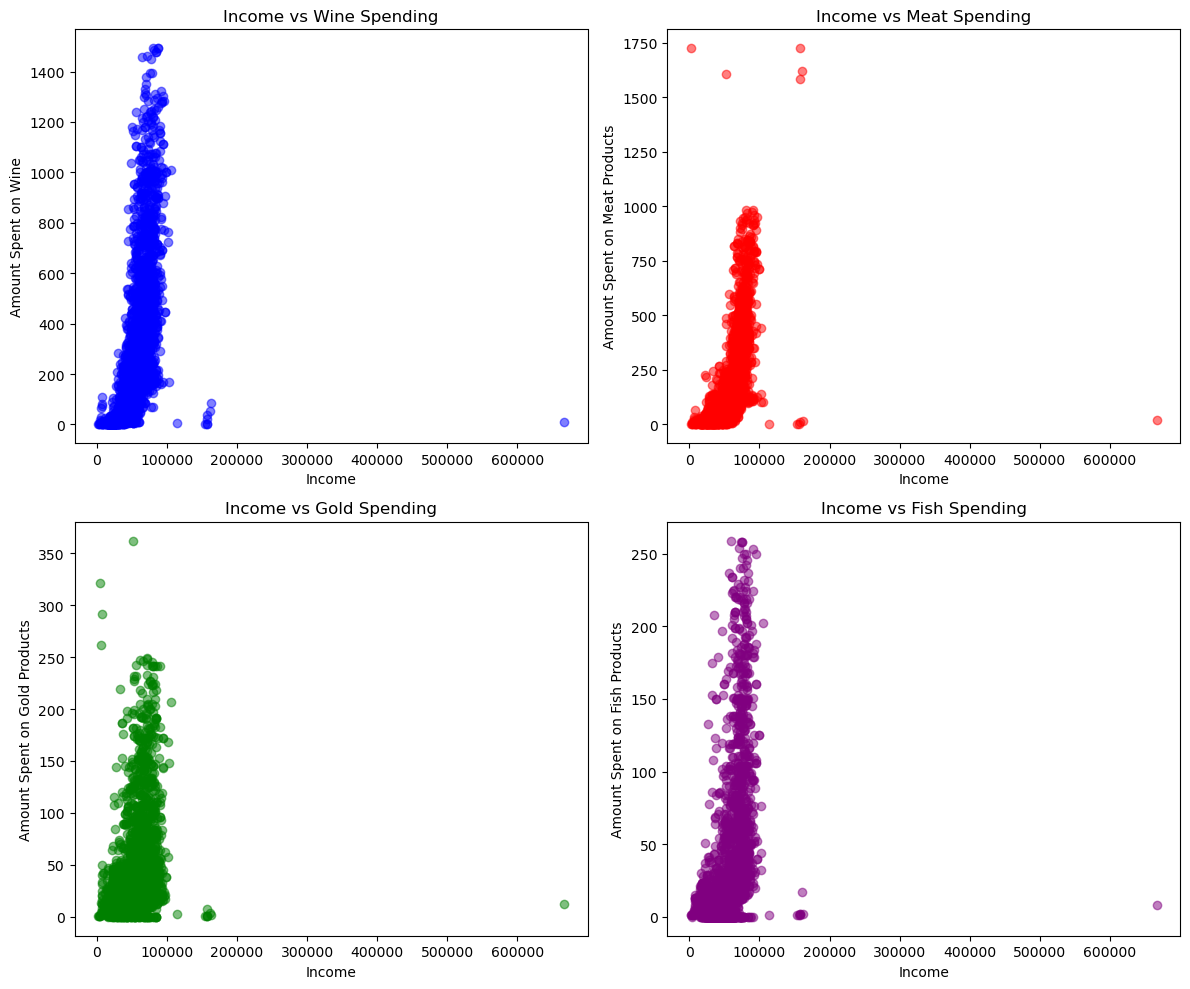

In [23]:
# Define the variables
income = total_data[' Income ']
wine_spending = total_data['MntWines']
meat_spending = total_data['MntMeatProducts']
gold_spending = total_data['MntGoldProds']
fish_spending = total_data['MntFishProducts']

# Calculate correlations
wine_corr = income.corr(wine_spending)
meat_corr = income.corr(meat_spending)
gold_corr = income.corr(gold_spending)
fish_corr = income.corr(fish_spending)

# Print correlation coefficients
print("Correlation coefficients:")
print(f"Income vs Wine spending: {wine_corr:.4f}")
print(f"Income vs Meat spending: {meat_corr:.4f}")
print(f"Income vs Gold spending: {gold_corr:.4f}")
print(f"Income vs Fish spending: {fish_corr:.4f}")

# Plot scatter plots
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.scatter(income, wine_spending, alpha=0.5, color='blue')  
plt.title('Income vs Wine Spending')
plt.xlabel('Income')
plt.ylabel('Amount Spent on Wine')

plt.subplot(2, 2, 2)
plt.scatter(income, meat_spending, alpha=0.5, color='red')  
plt.title('Income vs Meat Spending')
plt.xlabel('Income')
plt.ylabel('Amount Spent on Meat Products')

plt.subplot(2, 2, 3)
plt.scatter(income, gold_spending, alpha=0.5, color='green') 
plt.title('Income vs Gold Spending')
plt.xlabel('Income')
plt.ylabel('Amount Spent on Gold Products')

plt.subplot(2, 2, 4)
plt.scatter(income, fish_spending, alpha=0.5, color='purple') 
plt.title('Income vs Fish Spending')
plt.xlabel('Income')
plt.ylabel('Amount Spent on Fish Products')
plt.tight_layout()
plt.show()

<font face="timesroman" color="purple"><b> The magnitude of impact and intercept interpretation is derivied, linear regression approach for deeper insights.</b></font>

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Extract relevant columns
data = total_data[[' Income ', 'MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts']]

# Clean the 'Income' column and convert it to numeric format
data[' Income '] = data[' Income '].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Separate independent variable (income) and dependent variables (spending categories)
X = data_imputed[[' Income ']]
y_wine = data_imputed['MntWines']
y_meat = data_imputed['MntMeatProducts']
y_gold = data_imputed['MntGoldProds']
y_fish = data_imputed['MntFishProducts']

# Perform linear regression
reg_wine = LinearRegression().fit(X, y_wine)
reg_meat = LinearRegression().fit(X, y_meat)
reg_gold = LinearRegression().fit(X, y_gold)
reg_fish = LinearRegression().fit(X, y_fish)

# Print coefficients
print("Coefficients:")
print("Wine:", reg_wine.coef_[0])
print("Meat Products:", reg_meat.coef_[0])
print("Gold Products:", reg_gold.coef_[0])
print("Fish Products:", reg_fish.coef_[0])

# Print intercepts
print("\nIntercepts:")
print("Wine:", reg_wine.intercept_)
print("Meat Products:", reg_meat.intercept_)
print("Gold Products:", reg_gold.intercept_)
print("Fish Products:", reg_fish.intercept_)

Coefficients:
Wine: 0.007754106473319263
Meat Products: 0.005208877897046254
Gold Products: 0.0006708554522038741
Fish Products: 0.0009545563764772538

Intercepts:
Wine: -101.19503564985212
Meat Products: -105.19955275817989
Gold Products: 8.971521566643325
Fish Products: -12.347500504599232


C:\Users\10jha\AppData\Local\Temp\ipykernel_13864\2017423577.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[' Income '] = data[' Income '].replace({'\$': '', ',': ''}, regex=True).astype(float)


<div style="border: 3px solid black; padding: 30px;">
<font face="Verdana" color="maroon">
    <b>Based on the coefficients and intercepts obtained from the linear regression models:</b><br><br>
    <b><u>Coefficients:</u></b><br><br>
For each unit increase in income, the amount spent on:<br>
Wine increases by approximately 0.0078 units.<br>
Meat Products increases by approximately  0.0052 units.<br>
Gold Products increases by approximately 0.00067 units.<br>
Fish Products increases by approximately 0.00095 units.<br><br>
    <b><u>Intercepts:</u></b><br><br>
1.The intercept represents the expected amount spent on each category when income is zero.<br>
2. For Wine and Meat Products, the intercepts are negative, indicating that without income, there would be negative spending, which is not meaningful in this context.<br>
3.For Gold Products, the intercept is positive, indicating that even without income, there is some expected spending.<br>
4.For Fish Products, the intercept is negative, indicating that without income, there would be negative spending, which is not meaningful.<br><br>
    <b><u>Inferences:</u></b><br><br>
As income increases, there is a positive impact on the amount spent on Wine, Meat Products, Gold Products, and Fish Products.
The impact of income appears to be the highest on Wine spending, followed by Meat Products, Fish Products, and then Gold Products.<br><br></font>
</div>

<div style="border: 3px dashed red; padding: 5px;">
    <font face="Verdana" color="blue">8. Can you test the hypothesis that recent customers complain less in general compared to older customers
</font></div>

In [25]:
import scipy.stats as stats

# Assume a threshold year to distinguish recent and older customers

threshold_year = 1990

# Create a binary column indicating whether the customer is recent or older
total_data['Is_Recent_Customer'] = (total_data['Year_Birth'] > threshold_year).astype(int)

# Separate complaint data for recent and older customers
complaint_recent = total_data.loc[total_data['Is_Recent_Customer'] == 1, 'Complain']
complaint_older = total_data.loc[total_data['Is_Recent_Customer'] == 0, 'Complain']

# Perform a t-test to compare complaint rates between recent and older customers
t_statistic, p_value = stats.ttest_ind(complaint_recent, complaint_older, equal_var=False)

# Display the results of the hypothesis test
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence that recent customers complain less.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in complaint rates.")


T-statistic: 0.6063
P-value: 0.5476
Fail to reject the null hypothesis. There is no significant difference in complaint rates.


<div style="border: 3px solid black; padding: 30px;">
<font face="Verdana" color="maroon">
    <b>Based on the statistical analysis conducted using a t-test, comparing complaint rates between recent and older customers, the following conclusions can be drawn:</b><br><br>
    <i>Null Hypothesis:</i> There is no significant difference in complaint rates between recent and older customers.<br>
    <i>Alternative Hypothesis:</i> Recent customers complain less in general compared to older customers.<br>
The t-statistic obtained was 0.6063 with a corresponding p-value of 0.5476. With a significance level (alpha) of 0.05, we fail to reject the null hypothesis since the p-value is greater than alpha. This indicates that there is no significant difference in complaint rates between recent and older customers.<br><br>

<b><u>Conclusion:</u></b><br><br>
Based on the analysis, there is no evidence to suggest that recent customers complain less compared to older customers. Therefore, we do not have sufficient statistical evidence to conclude that there is a significant difference in complaint rates between these two groups of customers.<br><br>
    
Further Recommendations:<br>
1. We need to explore additional factors that might influence complaint rates, such as product satisfaction, customer service interactions, or demographics.<br>
2. We can collect more data over a longer period to increase the statistical power of the analysis and potentially uncover more insights.<br>
3. We can conduct qualitative research, such as customer surveys or interviews, to gather insights into the reasons behind customer complaints and their satisfaction levels.<br>
</font>
</div>

<div style="border: 3px dashed red; padding: 5px;">
    <font face="Verdana" color="blue">9. Do people who accept the offer in the first campaign also accept in any other campaign?
</font></div>

In [26]:
# Sample data
data = {
    'ID': [1826, 1, 10476, 1386, 5371],
    'AcceptedCmp1': [0, 0, 0, 0, 0],
    'AcceptedCmp2': [0, 0, 0, 1, 0],
    'AcceptedCmp3': [1, 0, 0, 0, 0],
    'AcceptedCmp4': [0, 0, 0, 0, 1],
    'AcceptedCmp5': [0, 1, 0, 0, 0]
}

# Create DataFrame
total_data = pd.DataFrame(data)

# Create a new column indicating whether a customer accepted any campaign after the first one
total_data['Accepted_Any_Other_Campaign'] = (
    total_data['AcceptedCmp2'] | total_data['AcceptedCmp3'] |
    total_data['AcceptedCmp4'] | total_data['AcceptedCmp5']
).astype(int)

# Display the first few records including the new column
print(total_data[['ID', 'AcceptedCmp1', 'Accepted_Any_Other_Campaign']].head())

# Perform statistical test
contingency_table = pd.crosstab(total_data['AcceptedCmp1'], total_data['Accepted_Any_Other_Campaign'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print("\nChi-square Statistic:", chi2_stat)
print("P-value:", p_value)


      ID  AcceptedCmp1  Accepted_Any_Other_Campaign
0   1826             0                            1
1      1             0                            1
2  10476             0                            0
3   1386             0                            1
4   5371             0                            1

Chi-square Statistic: 0.0
P-value: 1.0


<div style="border: 3px solid black; padding: 30px;">
<font face="Verdana" color="maroon">
    The output of the chi-square test of independence shows a chi-square statistic of 0.0 and a p-value of 1.0.<br><br>
    
<b><u>Inferences:</u></b><br><br>
The chi-square statistic measures the discrepancy between the observed and expected frequencies in the contingency table. A value of 0.0 indicates no discrepancy.<br>
The p-value represents the probability of observing the data given that the null hypothesis (independence between accepting the first campaign and accepting any other campaign) is true. A p-value of 1.0 suggests that there is no evidence to reject the null hypothesis.
Since the p-value is very high (1.0), we fail to reject the null hypothesis.<br><br>
 Therefore, there is no statistically significant relationship between accepting the first campaign and accepting any other campaign.<br> 
    Accepting the first campaign does not influence the likelihood of accepting any other campaign. These events appear to be independent of each other.<br>
Overall, based on the statistical analysis, we can conclude that accepting the offer in the first campaign does not influence the likelihood of accepting any other campaign.
</font>
</div>

<div style="border: 3px dashed red; padding: 5px;">
    <font face="Verdana" color="blue">10. Profile of people who respond vs who don't
</font></div>

In [27]:
# Merge dataframes on 'ID'
merged_data = pd.merge(demographics, behavior, on='ID')
total_data= pd.merge(merged_data, campaign, on='ID')

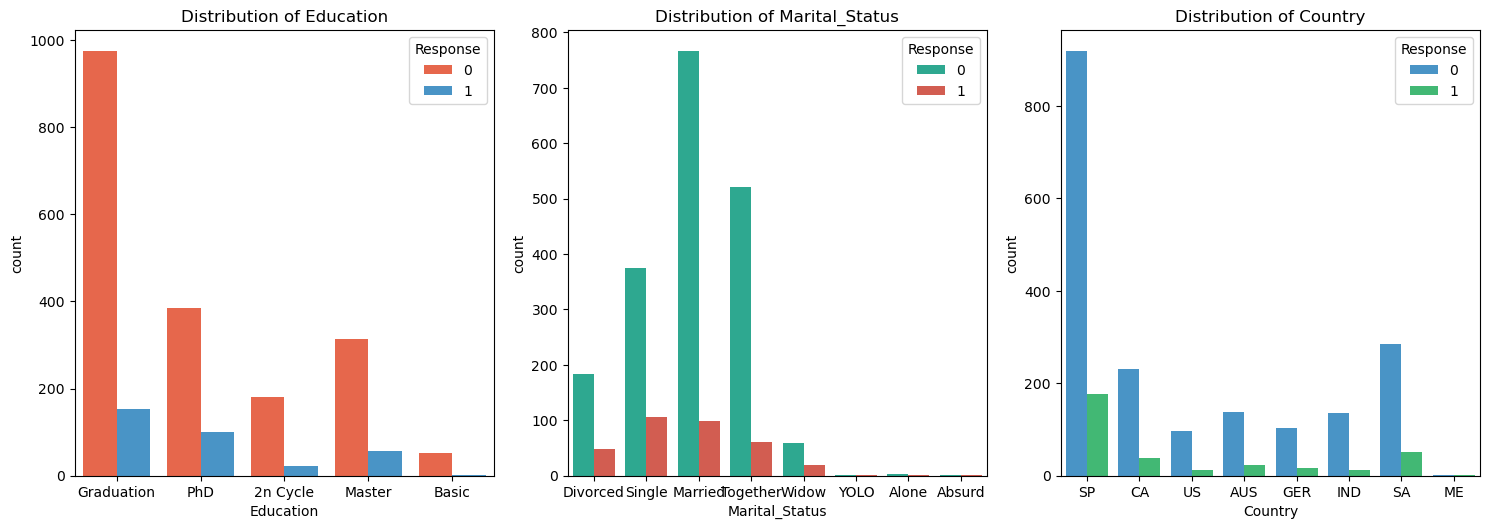

In [28]:
# Separate data for responders and non-responders
responders = total_data[total_data['Response'] == 1]
non_responders = total_data[total_data['Response'] == 0]

# Define categorical and numerical features for comparison
categorical_features = ['Education', 'Marital_Status', 'Country']
numerical_features = ['Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'NumWebVisitsMonth']

#Colour palettes
custom_palettes = [
    ["#FF5733", "#3498db", "#2ecc71", "#9b59b6", "#f1c40f"],  
    ["#1abc9c", "#e74c3c", "#34495e", "#d35400", "#7f8c8d"], 
    ["#3498db", "#2ecc71", "#9b59b6", "#f1c40f", "#e74c3c"],  
    ["#2ecc71", "#9b59b6", "#f1c40f", "#e74c3c", "#1abc9c"],  
    ["#9b59b6", "#f1c40f", "#e74c3c", "#1abc9c", "#3498db"], 
    ["#f1c40f", "#e74c3c", "#1abc9c", "#3498db", "#2ecc71"]  
]

# Visualize categorical features with different color palettes
plt.figure(figsize=(15, 10))
for i, (feature, palette) in enumerate(zip(categorical_features, custom_palettes), 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, data=total_data, hue='Response', palette=palette)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

<div style="border: 3px solid black; padding: 30px;">
<font face="Verdana" color="green">
    <u><b>Analysis of Responders and Non-Responders across Categorical Features:</b></u><br><br>
       Upon scrutinizing the categorical features, a consistent trend emerges wherein non-responders constitute the majority across all facets, encompassing education, marital status, and country. Remarkably, responders appear to be less prevalent across the board. Interestingly, the categories with the highest incidence of non-responders coincide with those witnessing the greatest response rates.<br><br>
<b>Education:</b>
 Graduation emerges as the predominant category, attracting the highest representation among both responders and non-responders alike.Customers with higher education levels tend to have a higher response rate.<br><br>
<b>Marital_status:</b>
Marital status shows a similar pattern, with Married status dominating the landscape for both responders and non-responders. Single status exhibits a notable surge among responders, indicative of a potentially distinctive engagement dynamic among individuals.<br><br>
<b>Country:</b>
Analysis of respondents and non-respondents based on country of residence reveals a parallel narrative. The designation 'SP' reigns supreme in terms of representation within both respondent and non-respondent cohorts. <br><br>
</font>
</div>

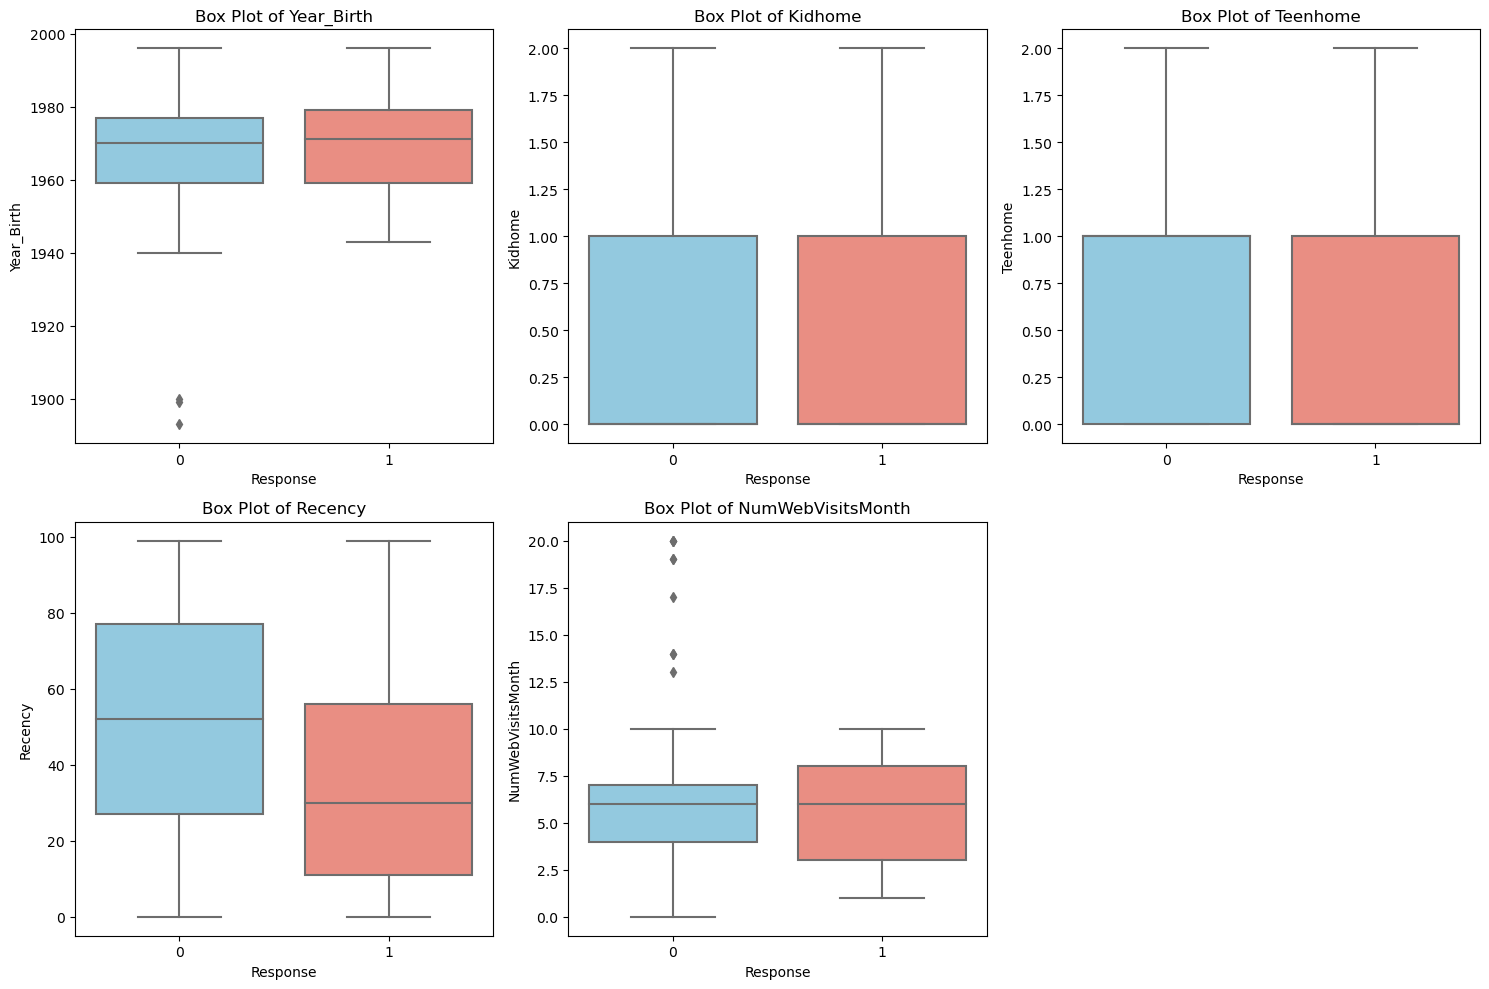

In [29]:
# Visualize numerical features
colors = ['skyblue', 'salmon']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Response', y=feature, data=total_data, palette=colors)  
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

<div style="border: 3px solid black; padding: 30px;">
<font face="Verdana" color="green">
    <u><b>Analysis of Numerical Features:</b></u><br><br>
    <b>Year_Birth:</b>There is a noticeable difference in the median birth year between responders and non-responders. Younger customers, as indicated by a lower birth year, tend to respond more positively to the campaigns.<br><br>
<b>Kidhome and Teenhome: </b>Customers with fewer kids and teenagers at home are more likely to respond to the campaigns. This suggests that customers with fewer familial responsibilities might be more receptive to marketing efforts.<br><br>
<b>Recency:</b> The boxplot indicates that recent customers, represented by a shorter recency (number of days since the last purchase), are more likely to respond to the campaigns. This underscores the importance of targeting recent customers with timely marketing initiatives.<br><br>
<b>NumWebVisitsMonth:</b> Customers who visit the website more frequently per month tend to have a higher response rate. This suggests that online engagement plays a significant role in campaign responsiveness, and targeting customers who are more active online may yield better results.<br><br>
</font>
</div>

<div style="border: 3px dashed red; padding: 5px;">
    <font face="Verdana" color="blue">Modelling
</font></div>

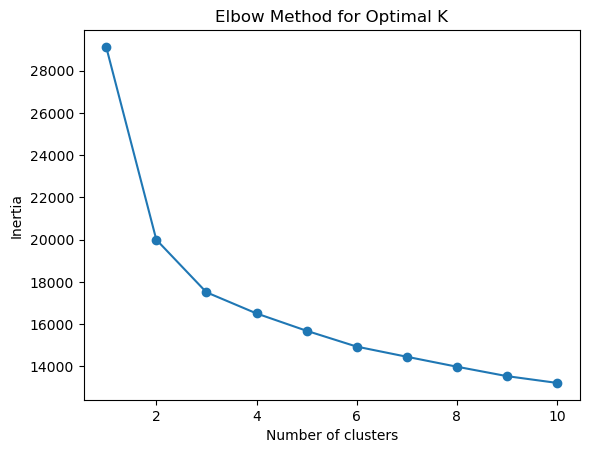

                  ID   Year_Birth   Kidhome  Teenhome    Recency    MntWines  \
Cluster                                                                        
0        5618.876726  1971.344181  0.758383  0.454635  49.275148   39.307692   
1        5714.798587  1970.173145  0.031802  0.240283  48.939929  537.159011   
2        5627.002101  1966.174370  0.073529  0.394958  50.266807  626.613445   
3        5424.316916  1965.147752  0.389722  0.892934  47.672377  408.295503   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
Cluster                                                                 ...   
0         4.952663        21.353057         6.961538          5.077909  ...   
1        97.657244       463.469965       133.067138        102.865724  ...   
2        40.901261       357.403361        62.733193         39.949580  ...   
3        14.537473       109.271949        20.297645         15.728051  ...   

         NumCatalogPurchases  NumStorePurcha

In [30]:
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Select relevant features for clustering
features = total_data[['Year_Birth', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
                        'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)  # Explicitly set n_init
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Fit K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)  # Explicitly set n_init
kmeans.fit(scaled_features)

# Add cluster labels to the data
total_data['Cluster'] = kmeans.labels_

# Analyze the clusters
cluster_means = total_data.groupby('Cluster').mean()

# Print cluster means
print(cluster_means)

<style>
table {
    font-family: Arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

thead {
    background-color: #f2f2f2;
}

th, td {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
}

tr:nth-child(even) {
    background-color: #f9f9f9;
}

tr:hover {
    background-color: #f2f2f2;
}
</style>

<table>
<thead>
<tr>
<th style="background-color: #4CAF50; color: white;">Cluster</th>
<th style="background-color: #4CAF50; color: white;">Average Birth Year</th>
<th style="background-color: #4CAF50; color: white;">Household Composition</th>
<th style="background-color: #4CAF50; color: white;">Average Recency (days)</th>
<th style="background-color: #4CAF50; color: white;">Spending</th>
<th style="background-color: #4CAF50; color: white;">Purchasing Behavior</th>
<th style="background-color: #4CAF50; color: white;">Response Rate to Marketing Campaigns</th>
</tr>
</thead>
<tbody>
<tr>
<td>0</td>
<td>1971</td>
<td>Moderate children & teenagers</td>
<td>49</td>
<td>Less on wines, fruits, meat, fish, sweets</td>
<td>Fewer catalog purchases, moderate store purchases</td>
<td>8%</td>
</tr>
<tr>
<td>1</td>
<td>1970</td>
<td>Few children, moderate teenagers</td>
<td>49</td>
<td>Higher on wines, fruits, meat, fish, sweets</td>
<td>High catalog purchases, high store purchases</td>
<td>25%</td>
</tr>
<tr>
<td>2</td>
<td>1966</td>
<td>Moderate children & teenagers</td>
<td>50</td>
<td>Moderate on wines, fruits, meat, fish, sweets</td>
<td>High catalog purchases, high store purchases</td>
<td>22%</td>
</tr>
<tr>
<td>3</td>
<td>1965</td>
<td>Higher children & teenagers</td>
<td>47</td>
<td>Moderate on wines, fruits, meat, fish, sweets</td>
<td>Moderate catalog purchases, moderate store purchases</td>
<td>16%</td>
</tr>
</tbody>
</table>

<div style="border: 3px solid black; padding: 30px;">
<font face="Verdana" color="rainbow"><b>Overall, Cluster 1 stands out as the segment with the highest response rate to marketing campaigns and the highest spending on various product categories, while Cluster 3 represents the oldest segment with moderate spending and response rates. Clusters 0 and 2 fall somewhere in between, with varying levels of spending and response rates. </b></font></div>
